In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## This reads in the USDA rural-urban continuum data from the web.

In [48]:
#USDA Metro/nonmetro codes 2013
usda_metro_2013 = pd.read_excel("https://www.ers.usda.gov/webdocs/DataFiles/53251/ruralurbancodes2013.xls")

#Make sure the data is read it
usda_metro_2013.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6.0,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1.0,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1.0,Metro - Counties in metro areas of 1 million p...


In [75]:
#USDA Metro/nonmetro codes 1993 & 2003
usda_metro_93_03 = pd.read_excel("https://www.ers.usda.gov/webdocs/DataFiles/53251/ruralurbancodes2003.xls")

#Make sure the data is read it
usda_metro_93_03.head()

,FIPS Code,State,County Name,1993 Rural-urban Continuum Code,2003 Rural-urban Continuum Code,2000 Population,Percent of workers in nonmetro counties commuting to central counties of adjacent metro areas,Description for 2003 codes
0,1001,AL,Autauga County,2,2,43671,0.000000,"County in metro area of 250,000 to 1 million p..."
1,1003,AL,Baldwin County,2,4,140415,23.110304,"Nonmetro county with urban population of 20,00..."
2,1005,AL,Barbour County,6,6,29038,5.247930,"Nonmetro county with urban population of 2,500..."
3,1007,AL,Bibb County,6,1,20826,0.000000,County in metro area with 1 million population...
4,1009,AL,Blount County,2,1,51024,0.000000,County in metro area with 1 million population...


In [60]:
#USDA Metro/nonmetro codes 1983
usda_metro_1983 = pd.read_excel("https://www.ers.usda.gov/webdocs/DataFiles/53251/cd8393.xls")

#Make sure the data is read it
usda_metro_1983.head()

,FIPS,State,County Name,1983 Rural-urban Continuum Code,1993 Rural-urban Continuum Code
0,1001,AL,AUTAUGA COUNTY,2,2
1,1003,AL,BALDWIN COUNTY,2,2
2,1005,AL,BARBOUR COUNTY,6,6
3,1007,AL,BIBB COUNTY,6,6
4,1009,AL,BLOUNT COUNTY,2,2


## Cleaning data
Here we are cleaning the data: 1) renaming columns, 2) changing data types, and 3) making a subset of just California state

In [56]:
usda_metro_2013.rename(columns = {'FIPS':'fips'}, inplace = True)
usda_metro_2013_ca = usda_metro_2013[usda_metro_2013['State'] == 'CA']
usda_metro_2013_ca.loc[:,'metro_2013']=usda_metro_2013_ca['RUCC_2013'].apply(lambda x: 1 if (x>= 1 and x<= 3) else 0)
usda_metro_2013_ca.head()

C:\Users\acade\anaconda3\envs\geo_ds\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\acade\anaconda3\envs\geo_ds\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,fips,State,County_Name,Population_2010,RUCC_2013,Description,metro_2013
186,6001,CA,Alameda County,1510271,1.0,Metro - Counties in metro areas of 1 million p...,1
187,6003,CA,Alpine County,1175,8.0,"Nonmetro - Completely rural or less than 2,500...",0
188,6005,CA,Amador County,38091,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",0
189,6007,CA,Butte County,220000,3.0,Metro - Counties in metro areas of fewer than ...,1
190,6009,CA,Calaveras County,45578,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",0


In [77]:
usda_metro_93_03.rename(columns = {'1993 Rural-urban Continuum Code':'RUCC_1993',
                                  '2003 Rural-urban Continuum Code':'RUCC_2003',
                                  'FIPS Code':'fips'}, inplace = True)
usda_metro_93_03_ca = usda_metro_93_03[usda_metro_93_03['State'] == 'CA']
usda_metro_93_03_ca.loc[:,'metro_1993']=usda_metro_93_03_ca['RUCC_1993'].apply(lambda x: 1 if (x>= 1 and x<= 3) else 0)
usda_metro_93_03_ca.loc[:,'metro_2003']=usda_metro_93_03_ca['RUCC_2003'].apply(lambda x: 1 if (x>= 1 and x<= 3) else 0)
usda_metro_93_03_ca.head()

C:\Users\acade\anaconda3\envs\geo_ds\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\acade\anaconda3\envs\geo_ds\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,fips,State,County Name,RUCC_1993,RUCC_2003,2000 Population,Percent of workers in nonmetro counties commuting to central counties of adjacent metro areas,Description for 2003 codes,metro_1993,metro_2003
184,6001,CA,Alameda County,0,1,1443741,0.000000,County in metro area with 1 million population...,0,1
185,6003,CA,Alpine County,9,8,1208,8.646003,Nonmetro county completely rural or less than ...,0,0
186,6005,CA,Amador County,6,6,35100,17.999701,"Nonmetro county with urban population of 2,500...",0,0
187,6007,CA,Butte County,3,3,203171,0.000000,"County in metro area of fewer than 250,000 pop...",1,1
188,6009,CA,Calaveras County,6,6,40554,17.272899,"Nonmetro county with urban population of 2,500...",0,0


In [78]:
usda_metro_1983.rename(columns = {'1983 Rural-urban Continuum Code':'RUCC_1983','FIPS':'fips'}, inplace = True)
usda_metro_1983_ca = usda_metro_1983[usda_metro_1983['State'] == 'CA']
usda_metro_1983_ca.loc[:,'metro_1983']=usda_metro_1983_ca['RUCC_1983'].apply(lambda x: 1 if (x>= 1 and x<= 3) else 0)
usda_metro_1983_ca.head()

C:\Users\acade\anaconda3\envs\geo_ds\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\acade\anaconda3\envs\geo_ds\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,fips,State,County Name,RUCC_1983,1993 Rural-urban Continuum Code,metro_1983
183,6001,CA,ALAMEDA COUNTY,0,0,0
184,6003,CA,ALPINE COUNTY,9,9,0
185,6005,CA,AMADOR COUNTY,8,6,0
186,6007,CA,BUTTE COUNTY,3,3,1
187,6009,CA,CALAVERAS COUNTY,8,6,0


## Reading in the county shapefile and making subset of California map

<AxesSubplot:>

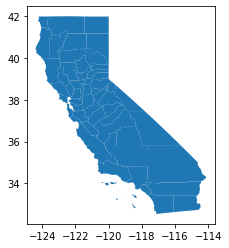

In [79]:
county = gpd.read_file("D:/documents copy/research/Practice/extract/county_shapefile/cb_2016_us_county_500k.shp")
county_CA = county[county['STATEFP'] == '06']
county_CA.plot()

## Merging all data together

In [85]:
county_CA_metro3=county_CA.merge(usda_metro_2013_ca, on='fips', how='inner', 
                             validate='one_to_one')
county_CA_metro2=county_CA_metro3.merge(usda_metro_2003_ca, on='fips', how='inner', 
                             validate='one_to_one')
county_CA_metro=county_CA_metro2.merge(usda_metro_1983_ca,  on='fips', how='inner', 
                             validate='one_to_one')
county_CA_metro.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,fips,...,2000 Population,Percent of workers in nonmetro counties commuting to central counties of adjacent metro areas,Description for 2003 codes,metro_2003,metro_1993,State,County Name_y,RUCC_1983,1993 Rural-urban Continuum Code,metro_1983
0,06,007,01675842,0500000US06007,06007,Butte,06,4238423343,105325812,6007,...,203171,0.000000,"County in metro area of fewer than 250,000 pop...",1,1,CA,BUTTE COUNTY,3,3,1
1,06,009,01675885,0500000US06009,06009,Calaveras,06,2641820834,43806026,6009,...,40554,17.272899,"Nonmetro county with urban population of 2,500...",0,0,CA,CALAVERAS COUNTY,8,6,0
2,06,011,01675902,0500000US06011,06011,Colusa,06,2980372757,14581043,6011,...,18804,14.237096,"Nonmetro county with urban population of 2,500...",0,0,CA,COLUSA COUNTY,6,6,0
3,06,017,00277273,0500000US06017,06017,El Dorado,06,4423349463,203269403,6017,...,156299,0.000000,County in metro area with 1 million population...,1,1,CA,EL DORADO COUNTY,1,1,1
4,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,6019,...,799407,0.000000,"County in metro area of 250,000 to 1 million p...",1,1,CA,FRESNO COUNTY,2,2,1


## Map of metro/nonmetro counties in California (1983)

<AxesSubplot:>

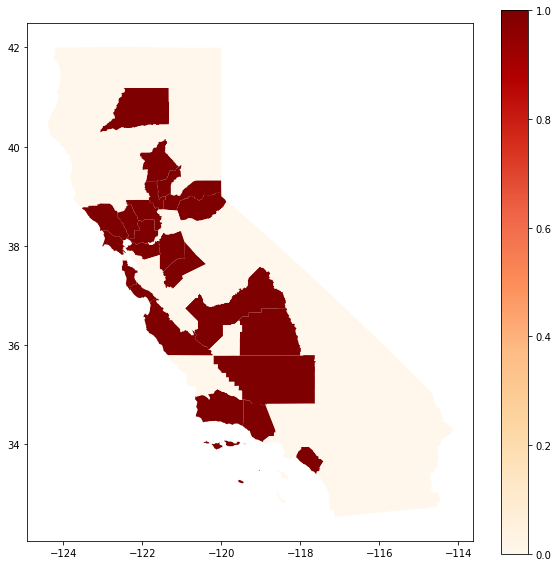

In [87]:
county_CA_metro.plot(figsize=(10,10), column='metro_1983', cmap='OrRd', legend=True)

## Map of metro/nonmetro counties in California (1993)

<AxesSubplot:>

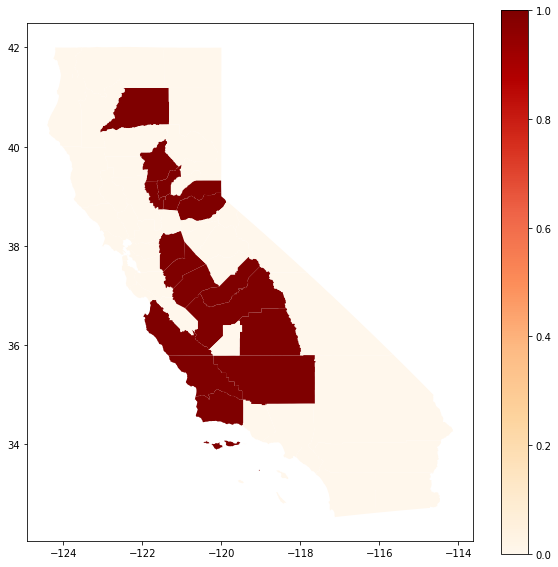

In [88]:
county_CA_metro.plot(figsize=(10,10), column='metro_1993', cmap='OrRd', legend=True)

## Map of metro/nonmetro counties in California (2003)

<AxesSubplot:>

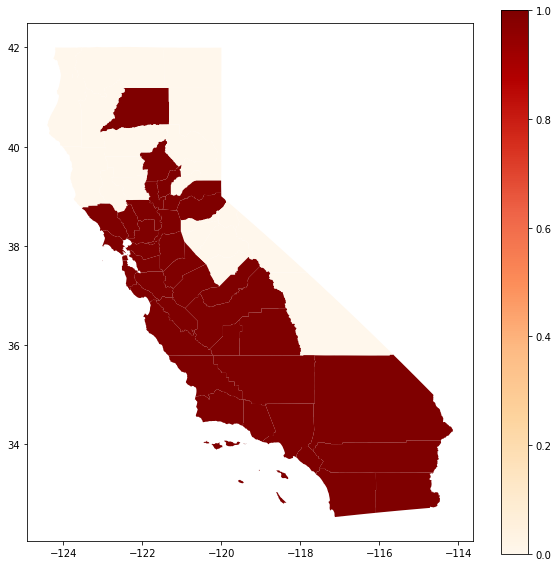

In [89]:
county_CA_metro.plot(figsize=(10,10), column='metro_2003', cmap='OrRd', legend=True)

## Map of metro/nonmetro counties in California (2013)

<AxesSubplot:>

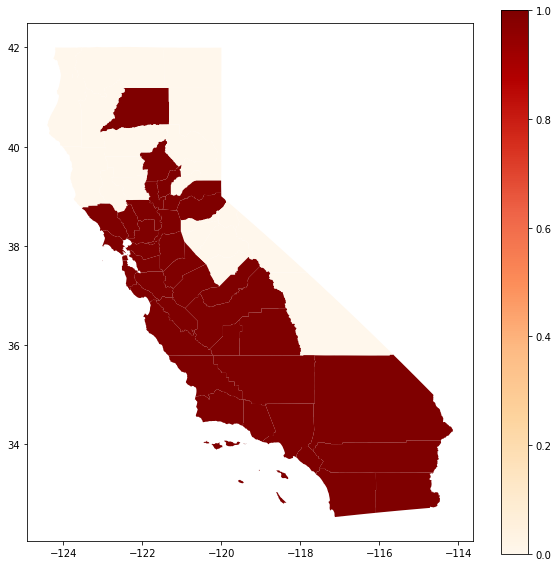

In [90]:
county_CA_metro.plot(figsize=(10,10), column='metro_2013', cmap='OrRd', legend=True)